In [ ]:
#build a logistic regression model using employee attrition to predict who will leave the job 
# importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing more laibraries to build the logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
#read the data
df=pd.read_csv('Employee-Attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
#show the shape
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#basic statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#exploration the attrition column
see=df['Attrition'].value_counts(normalize=True)
print(see)
df['Attrition'].value_counts()

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


,count
Attrition,
No,1233
Yes,237


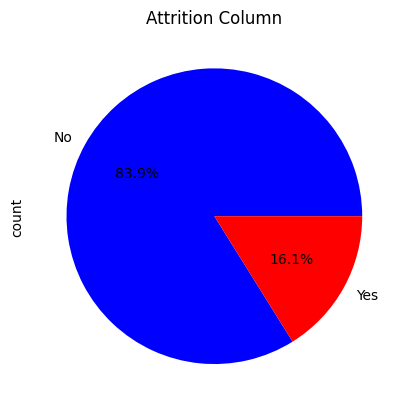

In [ ]:
#graph the attrition column
df['Attrition'].value_counts().plot(kind='pie',colors=('blue','red'),autopct='%1.1f%%')
plt.title('Attrition Column')
plt.show()

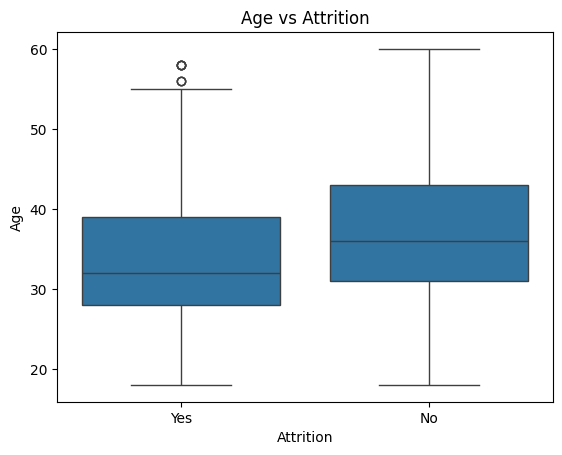

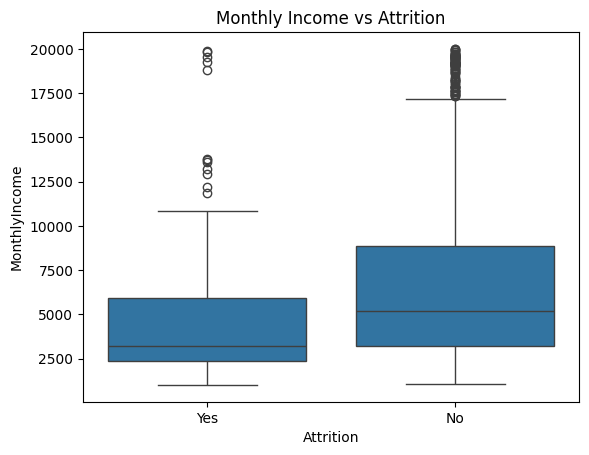

In [ ]:
#analyzing some important relationships like age and salary has a relat with attriton
sns.boxplot(x='Attrition',y='Age',data=df)
plt.title('Age vs Attrition')
plt.show()

sns.boxplot(x='Attrition',y='MonthlyIncome',data=df)
plt.title('Monthly Income vs Attrition')
plt.show()


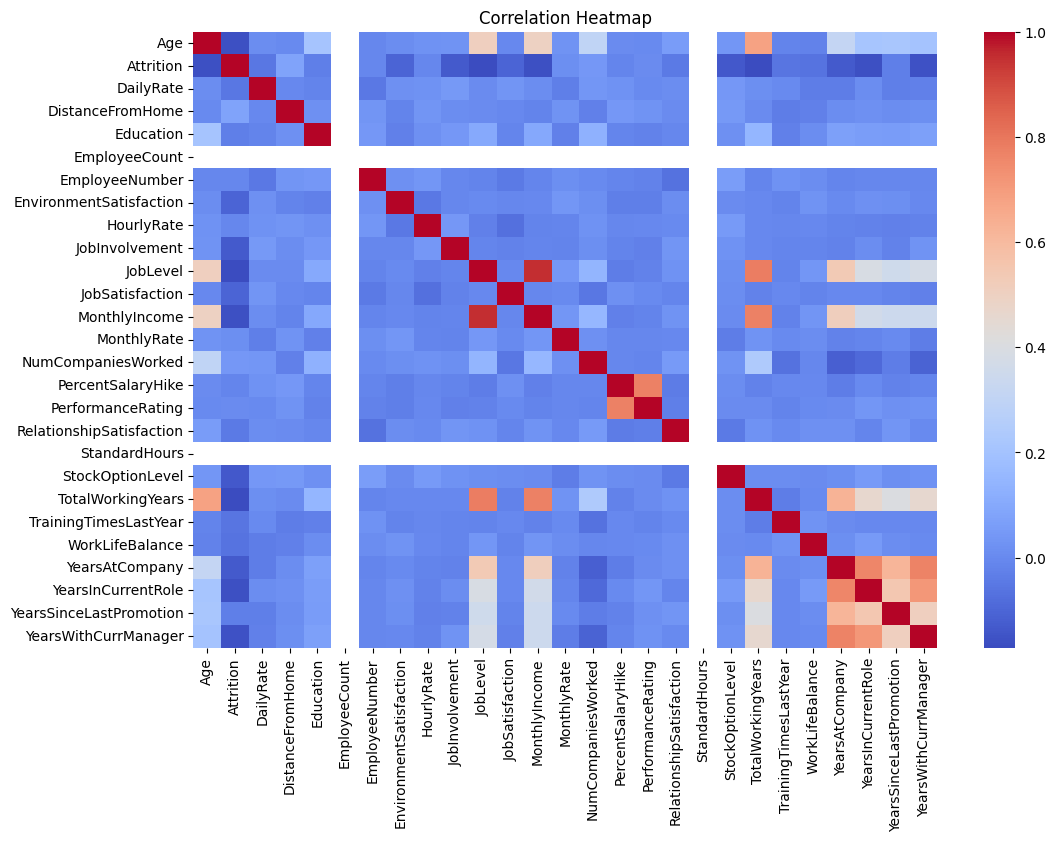

In [ ]:
#(encoding) Convert Attrition to numeric
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

#show the correlation heatmap between nomarical columns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=False,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [211]:
df.groupby('OverTime')['Attrition'].value_counts()

OverTime  Attrition
No        0            944
          1            110
Yes       0            289
          1            127
Name: count, dtype: int64

In [212]:
#attrition to JobSatisfaction
df.groupby('JobSatisfaction')['Attrition'].value_counts()

JobSatisfaction  Attrition
1                0            223
                 1             66
2                0            234
                 1             46
3                0            369
                 1             73
4                0            407
                 1             52
Name: count, dtype: int64

In [213]:
# as Age
pd.crosstab(pd.cut(df['Age'],
                   bins=[18,25,35,45,55,65]),df['Attrition'],normalize='index')

Attrition,0,1
Age,,
"(18, 25]",0.652174,0.347826
"(25, 35]",0.808581,0.191419
"(35, 45]",0.908120,0.091880
"(45, 55]",0.884956,0.115044
"(55, 65]",0.829787,0.170213


## **fearure engerring**

In [214]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [215]:
#get a list of numracl columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
print('numarical colums is:',num_cols)
print('numarical colums is:',num_cols.size)
print()
#get list of categorical columns
cat_cols=df.select_dtypes(include=['object']).columns
print('categorical colums is:',cat_cols)
print('categorical colums is:',cat_cols.size)
df.head()


numarical colums is: Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
numarical colums is: 27

categorical colums is: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
categorical colums is: 8


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [216]:
#convert the categorical columns into numatical
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [224]:
#feature scaling to dataset useing z_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Exclude the 'Attrition' column from scaling
num_cols_to_scale = df.select_dtypes(include=['int64','float64']).columns.drop('Attrition')
df[num_cols_to_scale]=scaler.fit_transform(df[num_cols_to_scale])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,TotalExperienceInCompany,RoleExperienceRatio,CompanyExperienceRatio,YearsPerJobRole,IncomePerYear,OverTimeImpact,SatisfactionStress
0,0.446350,1,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,...,False,True,True,-0.121519,0.367163,-0.057788,-0.061330,-0.007810,-0.210465,0.083003
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,...,True,False,False,0.668357,0.397653,0.200658,-0.144212,-0.056350,-0.005197,-0.039266
2,0.008343,1,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,...,False,True,True,-1.232727,0.789479,-0.729510,-0.083768,-0.576933,-1.781585,0.411228
3,-0.429664,0,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,...,True,False,True,0.494238,0.405120,0.110076,-0.320234,-0.347673,-1.451904,0.411228
4,-1.086676,0,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,...,True,False,False,-0.764182,0.196487,-0.729989,-0.074027,-0.553791,-0.005197,-1.084391


In [218]:
#creat new features

df['TotalExperienceInCompany'] = (df['YearsAtCompany'] + df['YearsInCurrentRole']).astype(float)
df['RoleExperienceRatio'] = (df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1)).astype(float)
df['CompanyExperienceRatio'] = (df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)).astype(float)
df['YearsPerJobRole'] = (df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)).astype(float)

df['IncomePerYear'] = (df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)).astype(float)
df['OverTimeImpact'] = (df['OverTime_Yes'].astype(int) * df['MonthlyIncome']).astype(float)

df['SatisfactionStress'] = (df['JobSatisfaction'] / (df['JobLevel'] + 1)).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   float64
 5   EmployeeCount                      1470 non-null   float64
 6   EmployeeNumber                     1470 non-null   float64
 7   EnvironmentSatisfaction            1470 non-null   float64
 8   HourlyRate                         1470 non-null   float64
 9   JobInvolvement                     1470 non-null   float64
 10  JobLevel                           1470 non-null   float64
 11  JobSatisfaction                    1470 non-null   float

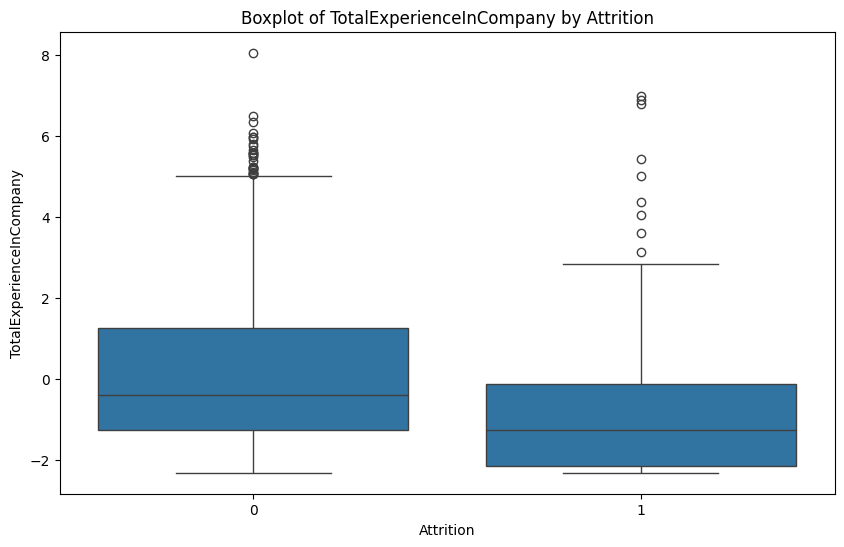

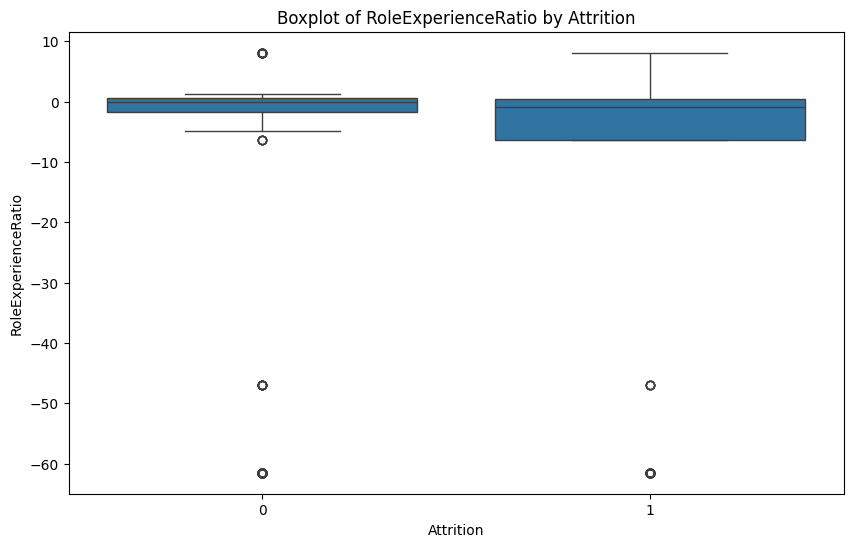

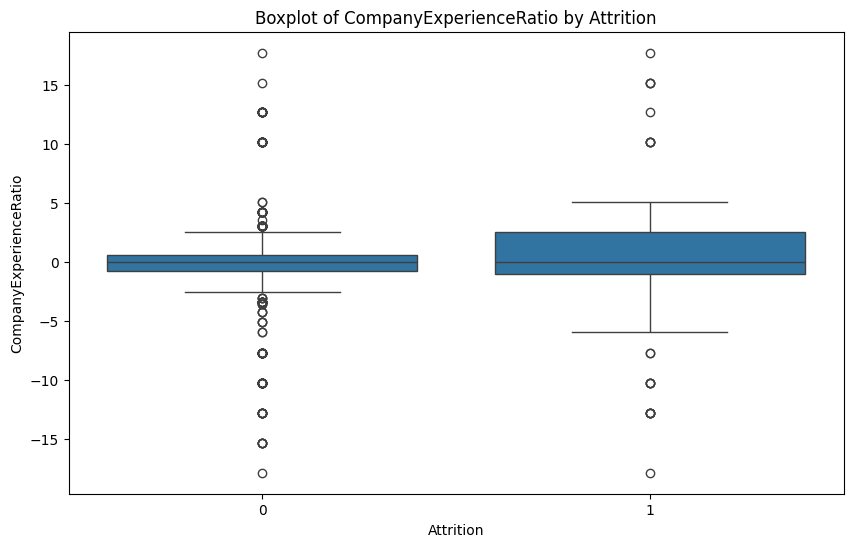

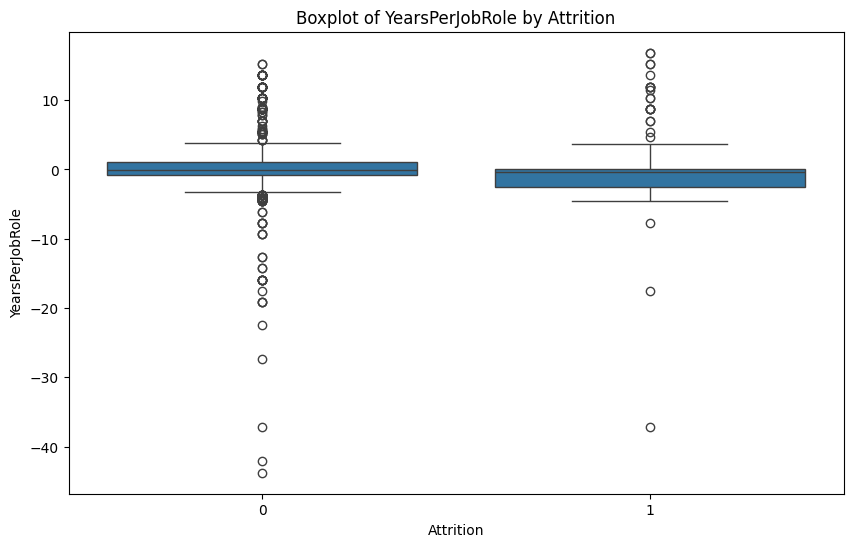

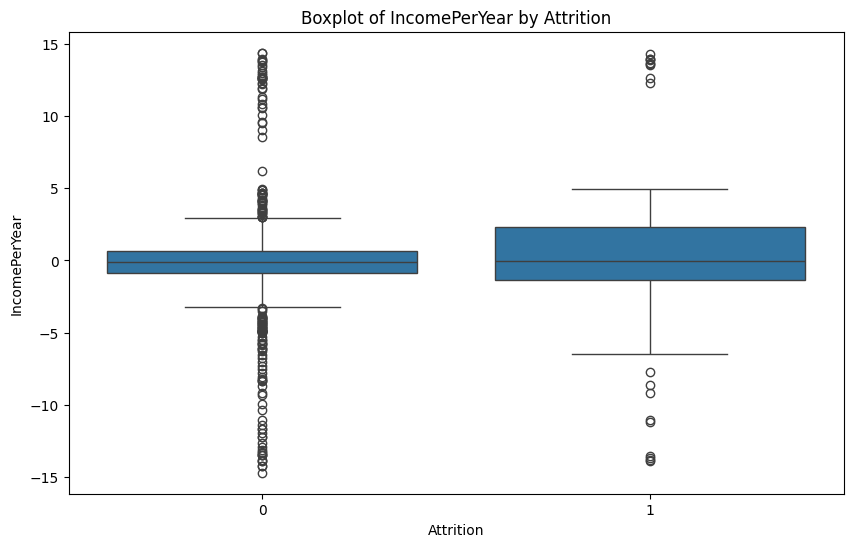

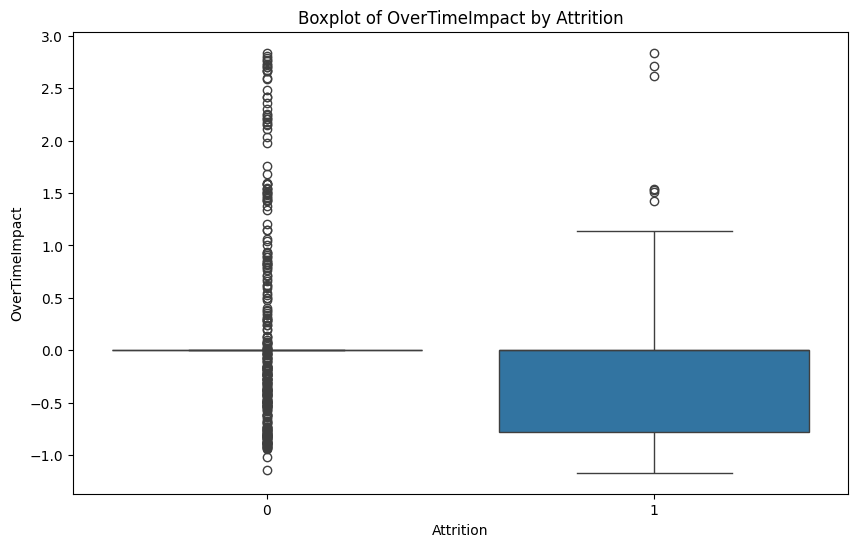

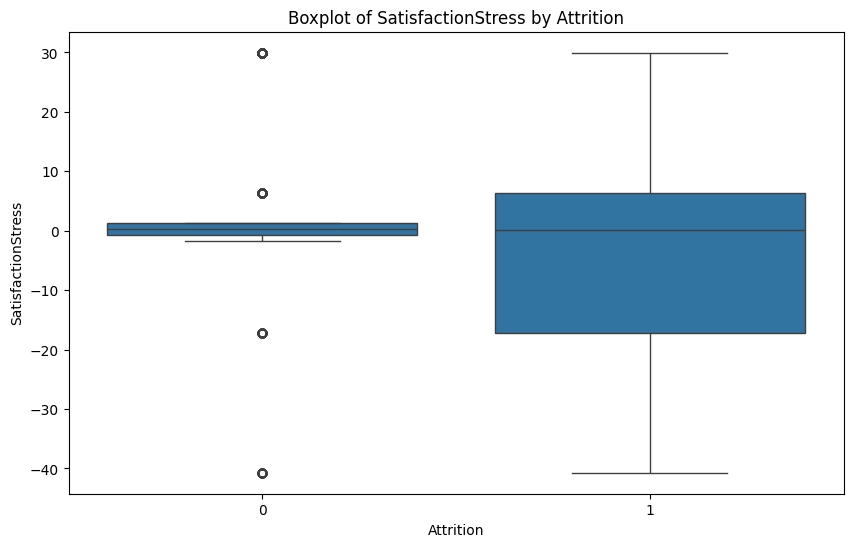

In [219]:
#test the relation btween the attrition column and new features  into boxplot
numeric_features=['TotalExperienceInCompany','RoleExperienceRatio','CompanyExperienceRatio','YearsPerJobRole','IncomePerYear','OverTimeImpact','SatisfactionStress']
#test the relation into boxplot
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Attrition',y=feature,data=df)
    plt.title(f'Boxplot of {feature} by Attrition')
    #plt.show()


In [220]:
#test the relation between the attrition column and new features columns into correlation (numarical result)
correlation_matrix = df[numeric_features + ['Attrition']].corr()
print(correlation_matrix)

                          TotalExperienceInCompany  RoleExperienceRatio  \
TotalExperienceInCompany                  1.000000             0.431575   
RoleExperienceRatio                       0.431575             1.000000   
CompanyExperienceRatio                    0.113321            -0.086478   
YearsPerJobRole                          -0.055722             0.112452   
IncomePerYear                             0.016841            -0.153027   
OverTimeImpact                            0.242927             0.080966   
SatisfactionStress                       -0.006891             0.015580   
Attrition                                -0.157258            -0.178397   

                          CompanyExperienceRatio  YearsPerJobRole  \
TotalExperienceInCompany                0.113321        -0.055722   
RoleExperienceRatio                    -0.086478         0.112452   
CompanyExperienceRatio                  1.000000        -0.096608   
YearsPerJobRole                        -0.096608

# **`model building`**

In [221]:
#prepare the data
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [222]:
#spilt the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [225]:
#creat the logistic regression model
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
#model prediction into tets data
y_pred=model.predict(x_test)

In [229]:
#evaluation the model
print("THE MODEL EVALUATION RESULT.....")
print("#############################")
accuracy=accuracy_score(y_test,y_pred)
print('1\accuracy of the model by accuracy is:',accuracy)
print()
classs=classification_report(y_test,y_pred)
print('2\accuracy of the model by accuracy is:',classs)
print()
con_mat=confusion_matrix(y_test,y_pred)
print('3\accuracy of the model by accuracy is:',con_mat)

THE MODEL EVALUATION RESULT.....
#############################
1ccuracy of the model by accuracy is: 0.8843537414965986

2ccuracy of the model by accuracy is:               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.59      0.44      0.50        39

    accuracy                           0.88       294
   macro avg       0.75      0.69      0.72       294
weighted avg       0.87      0.88      0.88       294


3ccuracy of the model by accuracy is: [[243  12]
 [ 22  17]]


In [232]:
#top important feature
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n📊 Top Influential Features:\n", feature_importance.head(10))


📊 Top Influential Features:
                              Feature  Coefficient
46                      OverTime_Yes     1.879189
45              MaritalStatus_Single     1.064310
37     JobRole_Laboratory Technician     1.017528
26  BusinessTravel_Travel_Frequently     0.940861
22                    YearsAtCompany     0.718843
13                NumCompaniesWorked     0.542627
34   EducationField_Technical Degree     0.533471
24           YearsSinceLastPromotion     0.488564
35                       Gender_Male     0.438381
43      JobRole_Sales Representative     0.400260
